#Project - Diabetes Prediction
Author: Charisma Riyan Etta | E-mail: charismariyan@gmail.com

Diabetes Dataset used is originally from the National Institute of Diabetes and Digestive and Kidney Disease. The objective is to predict based on diagnostic measurements whether a patient has diabetes. 
Dataset can be downloaded from: https://www.kaggle.com/mathchi/diabetes-data-set/download


Assumption: 
All patients are females at least 21 years old of Pima Indian heritage.
*  Pregnancies: Number of times pregnant
*  Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*  BloodPressure: Diastolic blood pressure (mm Hg)
*  SkinThickness: Triceps skin fold thickness (mm)
*  Insulin: 2-Hour serum insulin (mu U/ml)
*  BMI: Body mass index (weight in kg/(height in m)^2)
*  DiabetesPedigreeFunction: Diabetes pedigree function
*  Age: Age (in years)
*  Outcome: Class variable (0=tested non-diabetes or 1=tested diabetes)


###Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Train-Test split
from sklearn.model_selection import train_test_split

#Regresi
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

#Klasifikasi
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Validation
import tensorflow as tf
from tensorflow import keras

#Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

###Data Processing

In [ ]:
# Loading the dataset pandas dataframe
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Returns first five observations of the data set
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Showing the number of rows and columns
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Find out if there is an empty data in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###Correlation

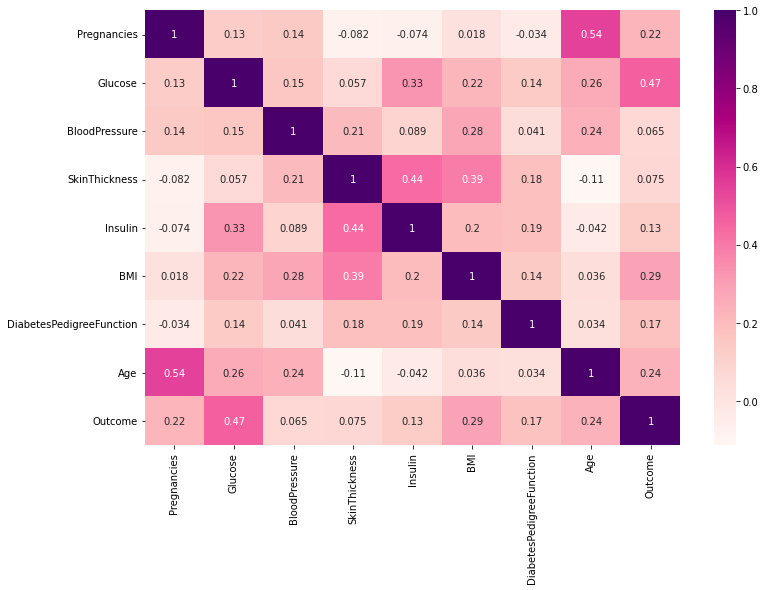

In [ ]:
#Showing the corelation of each columns

Corelation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(Corelation, annot=True, cmap='RdPu')
plt.show()

From the correlation matrix, it shows that the outcome is most correlated with Glucose concentration, and it is medium-corelated with BMI, Age, also Pregnancies. The outcome (a person is tested diabetes or non-diabetes), is least correlated with Blood Pressure and Skin Thickness.

###Data Visualization

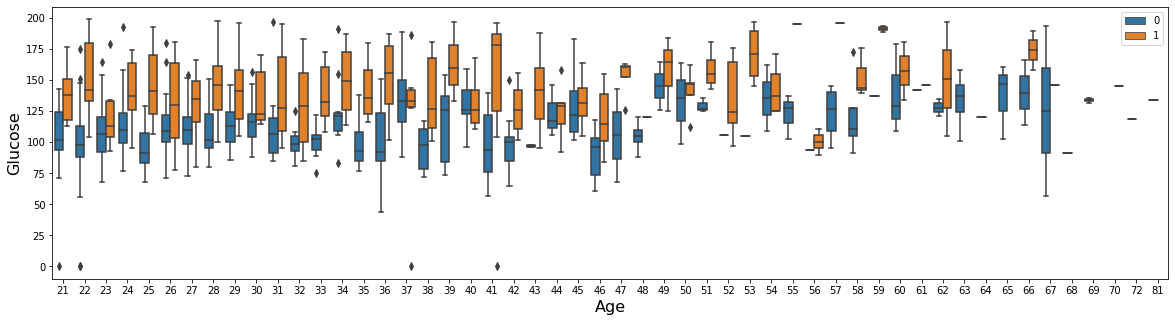

In [ ]:
# boxplot:
plt.figure(figsize=(20, 5))
sns.boxplot(x="Age",
            y="Glucose",
            hue="Outcome",
            data=df)
#plt.title("", fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Glucose", fontsize=16)
plt.legend(loc="upper right")
#plt.ylim(0, 600)
plt.show()

####Graph: The affect of the number of Pregnancies on diabetes.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


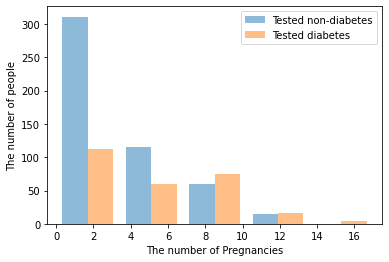

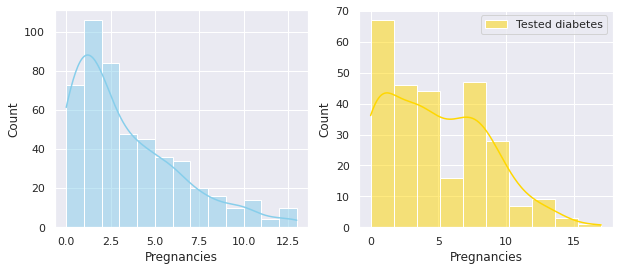

In [ ]:
plt.hist([df[df.Outcome==0].Pregnancies,
          df[df.Outcome==1].Pregnancies],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("The number of Pregnancies")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].Pregnancies, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].Pregnancies,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Glucose Concentration on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


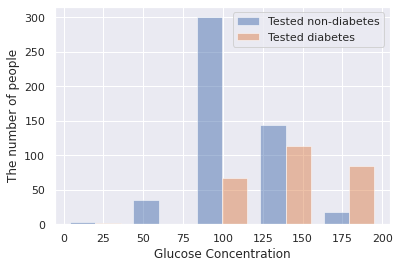

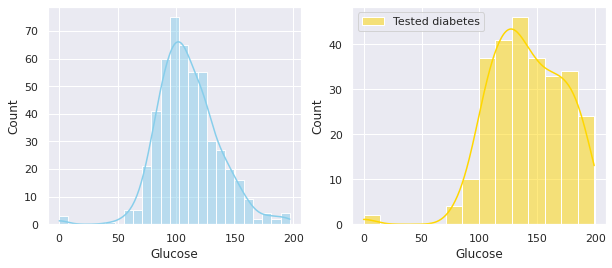

In [ ]:
plt.hist([df[df.Outcome==0].Glucose,
          df[df.Outcome==1].Glucose],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Glucose Concentration")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].Glucose, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].Glucose,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Blood Pressure on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


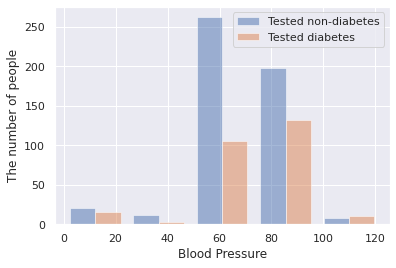

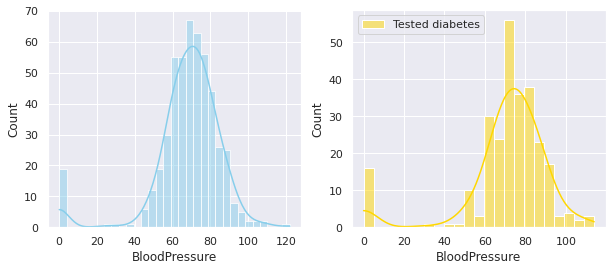

In [ ]:
plt.hist([df[df.Outcome==0].BloodPressure,
          df[df.Outcome==1].BloodPressure],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Blood Pressure")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].BloodPressure, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])

sns.histplot(data=df, x=df[df.Outcome==1].BloodPressure,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Skin Thickness on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


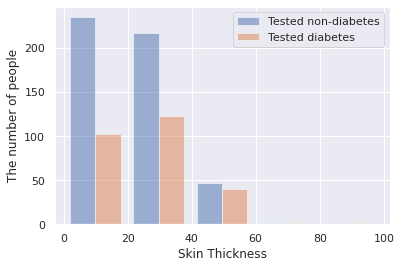

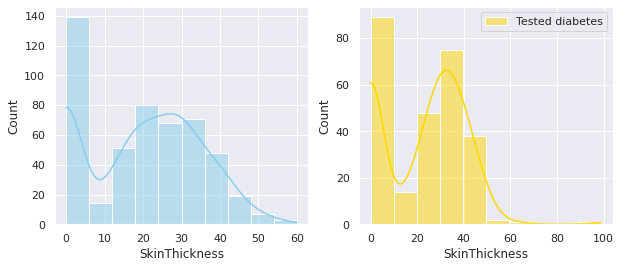

In [ ]:
plt.hist([df[df.Outcome==0].SkinThickness,
          df[df.Outcome==1].SkinThickness],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Skin Thickness")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].SkinThickness, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].SkinThickness,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Insulin on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


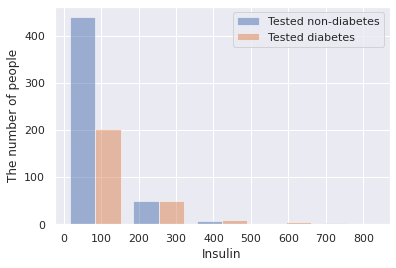

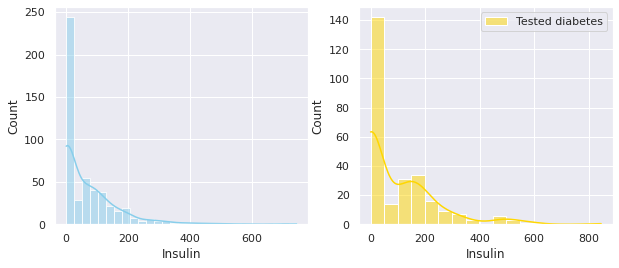

In [ ]:
plt.hist([df[df.Outcome==0].Insulin,
          df[df.Outcome==1].Insulin],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Insulin")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].Insulin, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].Insulin,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of BMI on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


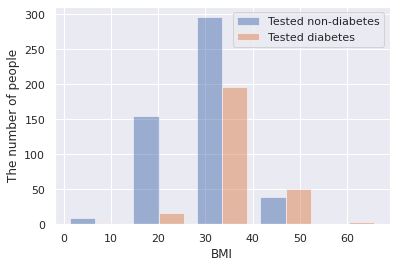

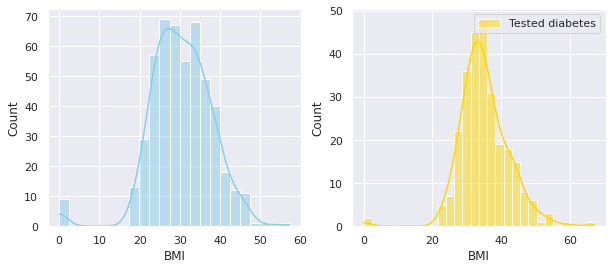

In [ ]:
plt.hist([df[df.Outcome==0].BMI,
          df[df.Outcome==1].BMI],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("BMI")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].BMI, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].BMI,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Diabetes Pedigree Function on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


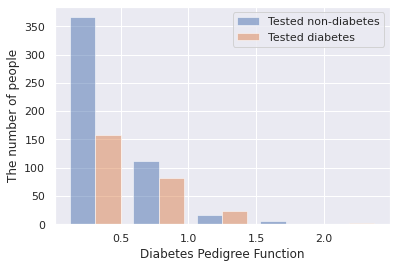

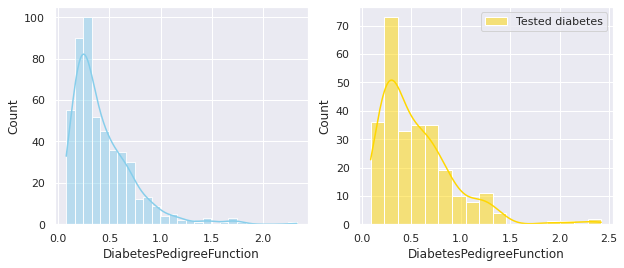

In [ ]:
plt.hist([df[df.Outcome==0].DiabetesPedigreeFunction,
          df[df.Outcome==1].DiabetesPedigreeFunction],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("The number of people")
plt.legend()
plt.show()


sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].DiabetesPedigreeFunction, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].DiabetesPedigreeFunction,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

####Graph: The affect of Age on diabetes.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


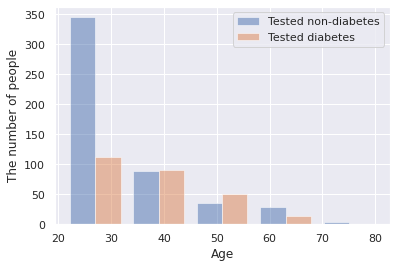

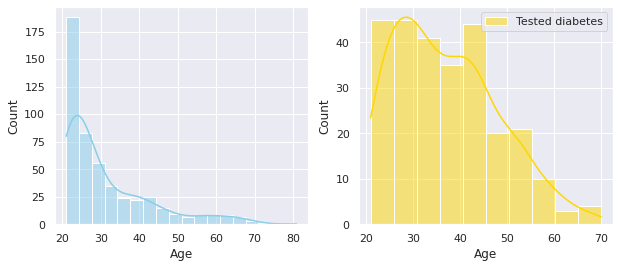

In [ ]:
plt.hist([df[df.Outcome==0].Age,
          df[df.Outcome==1].Age],
         bins=5, alpha=0.5,
         label=["Tested non-diabetes","Tested diabetes"])
plt.xlabel("Age")
plt.ylabel("The number of people")
plt.legend()
plt.show()

# A graph showing the distribution of the number of people with/without diabetes over Age.
sns.set(style="darkgrid")
fig, axs=plt.subplots(1 ,2,figsize=(10,4))

sns.histplot(data=df, x=df[df.Outcome==0].Age, color="skyblue",
             label="Tested non-diabetes",kde=True,ax=axs[0])
sns.histplot(data=df, x=df[df.Outcome==1].Age,color="gold",
             label="Tested diabetes",kde=True,ax=axs[1])
plt.legend()
plt.show()

###Data Balancing

In [ ]:
# Showing the number of people tested non-diabetes and tested diabetes of the data set
df_Outcome = df.groupby("Outcome").size()
print(df_Outcome)

Outcome
0    500
1    268
dtype: int64


Text(0.5, 1.0, 'Diabetes Count (0 = Non-Diabetes, 1 = Have Diabetes)')

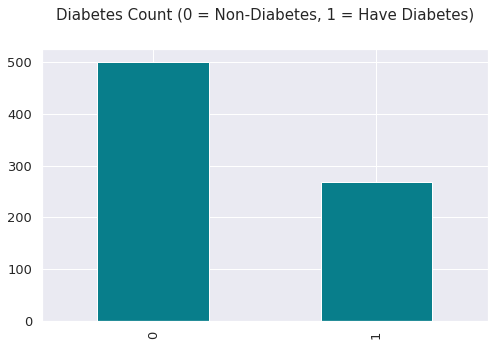

In [ ]:
outcome_count = df.Outcome.value_counts().plot(kind = 'bar', figsize=(8,5),fontsize=13, color='#087E8B')
outcome_count.set_title('Diabetes Count (0 = Non-Diabetes, 1 = Have Diabetes)', size=15, pad=30)

**Synthetic Minority Oversampling Technique (SMOTE)** \\
SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# Define features x and the target y
x = df.drop(columns="Outcome",axis=1)
y = df["Outcome"]

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x,y=oversample.fit_resample(x,y)
x_oversample,y_oversample=oversample.fit_resample(x,y)


In [ ]:
x_oversample.shape

(1000, 8)

In [ ]:
y_oversample.shape

(1000,)

###Train-Test Split

In [ ]:
# Show the input columns
x_oversample.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# Split the data set into train and test set
x_train,x_test,y_train,y_test = train_test_split(x_oversample,y_oversample,test_size=0.2,random_state=10)

In [ ]:
print(x_oversample.shape, x_train.shape, x_test.shape)

(1000, 8) (800, 8) (200, 8)


##Regresi

**Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

lr_MAE = mean_absolute_error(y_test, lr_pred)
lr_MAPE = mean_absolute_percentage_error(y_test, lr_pred)
lr_R2 = r2_score(y_test, lr_pred)
lr_MSE = mean_squared_error(y_test, lr_pred)

print("Linear Regression")
print("-----------------")
print(f'Mean Absolute Error: {lr_MAE}')
print(f'Mean Absolute Percentage Error: {lr_MAPE}')
print(f'R2 Score: {lr_R2}')
print(f'Mean Squared Error: {lr_MSE}')

Linear Regression
-----------------
Mean Absolute Error: 0.35433817940178386
Mean Absolute Percentage Error: 751667734494044.8
R2 Score: 0.2996006048436859
Mean Squared Error: 0.17424185953001203


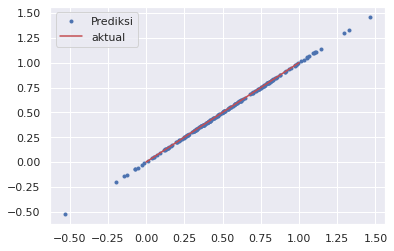

In [ ]:
plt.plot(lr_pred,lr_pred,'b.',label='Prediksi')
plt.plot(y_test.values,y_test.values,'r-',label='aktual')
plt.legend()
plt.show()

**Support Vector Regression (SVR)**

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)

svr_MAE = mean_absolute_error(y_test, svr_pred)
svr_MAPE = mean_absolute_percentage_error(y_test, svr_pred)
svr_R2 = r2_score(y_test, svr_pred)
svr_MSE = mean_squared_error(y_test, svr_pred)

print("Support Vector Regression (SVR)")
print("-------------------------------")
print(f'Mean Absolute Error: {svr_MAE}')
print(f'Mean Absolute Percentage Error: {svr_MAPE}')
print(f'R2 Score: {svr_R2}')
print(f'Mean Squared Error: {svr_MSE}')

Support Vector Regression (SVR)
-------------------------------
Mean Absolute Error: 0.3323500686218639
Mean Absolute Percentage Error: 724149956459707.9
R2 Score: 0.2524740823334266
Mean Squared Error: 0.18596576016750177


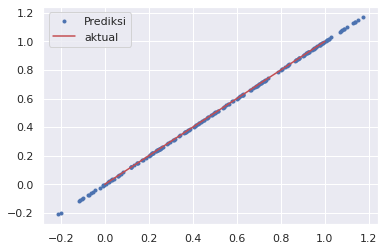

In [ ]:
plt.plot(svr_pred,svr_pred,'b.',label='Prediksi')
plt.plot(y_test.values,y_test.values,'r-',label='aktual')
plt.legend()
plt.show()

**Decision Tree Regressor**

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

dtr_pred = dtr.predict(x_test)

dtr_MAE = mean_absolute_error(y_test, dtr_pred)
dtr_MAPE = mean_absolute_percentage_error(y_test, dtr_pred)
dtr_R2 = r2_score(y_test, dtr_pred)
dtr_MSE = mean_squared_error(y_test, dtr_pred)

print("Decision Tree Regressor")
print("-----------------------")
print(f'Mean Absolute Error: {dtr_MAE}')
print(f'Mean Absolute Percentage Error: {dtr_MAPE}')
print(f'R2 Score: {dtr_R2}')
print(f'Mean Squared Error: {dtr_MSE}')

Decision Tree Regressor
-----------------------
Mean Absolute Error: 0.255
Mean Absolute Percentage Error: 607985949695017.0
R2 Score: -0.025022610792885258
Mean Squared Error: 0.255


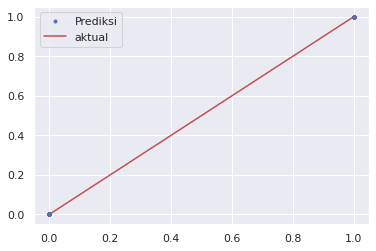

In [ ]:
plt.plot(dtr_pred,dtr_pred,'b.',label='Prediksi')
plt.plot(y_test.values,y_test.values,'r-',label='aktual')
plt.legend()
plt.show()

**Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_pred = rfr.predict(x_test)

rfr_MAE = mean_absolute_error(y_test, rfr_pred)
rfr_MAPE = mean_absolute_percentage_error(y_test, rfr_pred)
rfr_R2 = r2_score(y_test, rfr_pred)
rfr_MSE = mean_squared_error(y_test, rfr_pred)

print("Random Forest Regressor")
print("-----------------------")
print(f'Mean Absolute Error: {rfr_MAE}')
print(f'Mean Absolute Percentage Error: {rfr_MAPE}')
print(f'R2 Score: {rfr_R2}')
print(f'Mean Squared Error: {rfr_MSE}')

Random Forest Regressor
-----------------------
Mean Absolute Error: 0.27385
Mean Absolute Percentage Error: 602131270179435.4
R2 Score: 0.4596583257964024
Mean Squared Error: 0.13442349999999997


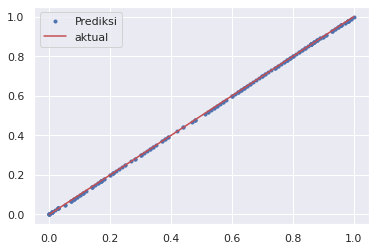

In [ ]:
plt.plot(rfr_pred,rfr_pred,'b.',label='Prediksi')
plt.plot(y_test.values,y_test.values,'r-',label='aktual')
plt.legend()
plt.show()

##Klasifikasi

**Support Vector Classifier (SVC)**

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_acc = accuracy_score(y_test, svc_pred)

print("Support Vector Classifier (SVC)")
print("-------------------------------")
print(f'Accuracy score: {svc_acc}')
print("-------------------------------")
print("Classification Report:")
print(classification_report(y_test, svc_pred))

Support Vector Classifier (SVC)
-------------------------------
Accuracy score: 0.725
-------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        93
           1       0.75      0.74      0.74       107

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.73       200



**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)

dtc_acc = accuracy_score(y_test, dtc_pred)

print("Decision Tree Classifier")
print("-------------------------------")
print(f'Accuracy score: {dtc_acc}')
print("-------------------------------")
print("Classification Report:")
print(classification_report(y_test, dtc_pred))

Decision Tree Classifier
-------------------------------
Accuracy score: 0.72
-------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        93
           1       0.73      0.76      0.74       107

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

rfc_acc = accuracy_score(y_test, rfc_pred)

print("Random Forest Classifier")
print("-------------------------------")
print(f'Accuracy score: {rfc_acc}')
print("-------------------------------")
print("Classification Report:")
print(classification_report(y_test, rfc_pred))

Random Forest Classifier
-------------------------------
Accuracy score: 0.81
-------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        93
           1       0.81      0.84      0.83       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Dari ketiga model, berdasarkan tingkat akurasi yang diperoleh maka penggunaan Random Forest Classifier adalah yang paling baik dengan tingkat akurasi tertinggi yaitu 81%.

####**Confusion matrix**

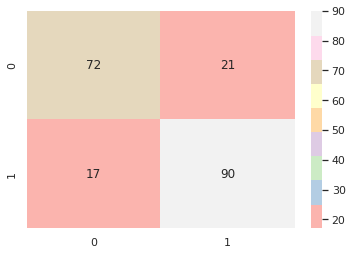

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, cmap='Pastel1')

####Train vs Validation

In [ ]:
# Validation
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=10)
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(8,)),
                          keras.layers.Dense(8,activation=tf.nn.relu),
                          keras.layers.Dense(8,activation=tf.nn.relu),
                          keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=35,batch_size=1,validation_data=(x_val,y_val))

Epoch 1/35
640/640 [==============================] - 3s 3ms/step - loss: 7.7416 - accuracy: 0.4953 - val_loss: 1.3713 - val_accuracy: 0.4812
Epoch 2/35
640/640 [==============================] - 1s 2ms/step - loss: 1.2104 - accuracy: 0.5391 - val_loss: 1.1575 - val_accuracy: 0.5625
Epoch 3/35
640/640 [==============================] - 1s 2ms/step - loss: 0.9715 - accuracy: 0.5875 - val_loss: 0.7712 - val_accuracy: 0.6562
Epoch 4/35
640/640 [==============================] - 1s 2ms/step - loss: 0.8762 - accuracy: 0.5906 - val_loss: 0.6858 - val_accuracy: 0.6687
Epoch 5/35
640/640 [==============================] - 1s 2ms/step - loss: 0.7971 - accuracy: 0.6172 - val_loss: 0.7148 - val_accuracy: 0.6313
Epoch 6/35
640/640 [==============================] - 1s 2ms/step - loss: 0.7484 - accuracy: 0.6250 - val_loss: 0.7582 - val_accuracy: 0.5625
Epoch 7/35
640/640 [==============================] - 1s 2ms/step - loss: 0.7284 - accuracy: 0.6391 - val_loss: 0.8874 - val_accuracy: 0.5688
Epoch 

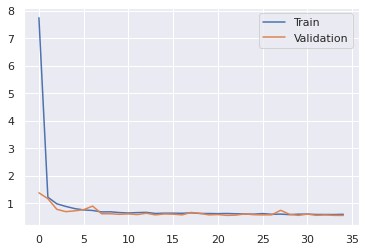

In [ ]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

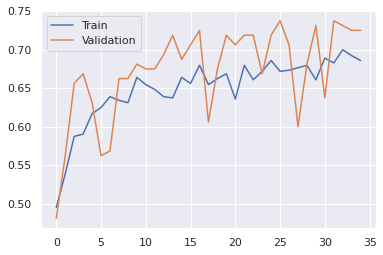

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()

##Clustering

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**Elbow Method** to find the number of optimal clusters

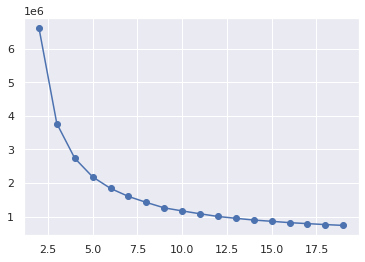

In [ ]:
elbow=[]
for i in range(2,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x)
  elbow.append(kmeans.inertia_)

plt.plot(range(2,20),elbow,'bo-')

In [ ]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(x)

kmeans.labels_[:20]

array([5, 2, 5, 0, 4, 2, 0, 7, 3, 2, 2, 5, 5, 6, 4, 7, 1, 2, 0, 0],
      dtype=int32)

In [ ]:
agg=AgglomerativeClustering(n_clusters=8)
agg.fit(x)

agg.labels_[:20]

array([2, 3, 2, 4, 0, 3, 4, 6, 5, 2, 3, 2, 2, 7, 0, 6, 0, 3, 4, 4])

In [ ]:
kmean=silhouette_score(x,kmeans.labels_)
agglo=silhouette_score(x,agg.labels_)

print(kmean)
print(agglo)

0.37366172621743965
0.375130462561434


**Clustering Visualisation**

In [ ]:
# membuat objek KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


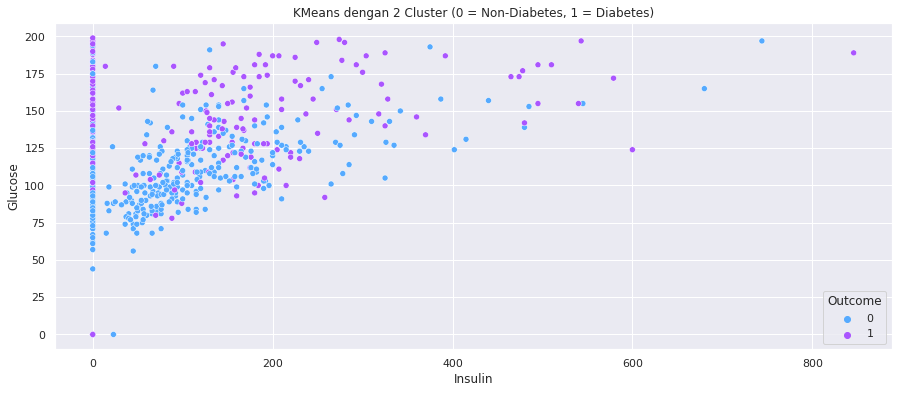

In [ ]:
# membuat plot KMeans dengan 2 klaster
import seaborn as sns

plt.figure(figsize=(15,6))
sns.scatterplot(df['Insulin'], df['Glucose'], hue=df['Outcome'],
                palette=sns.color_palette('cool', 2))
plt.title('KMeans dengan 2 Cluster (0 = Non-Diabetes, 1 = Diabetes)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


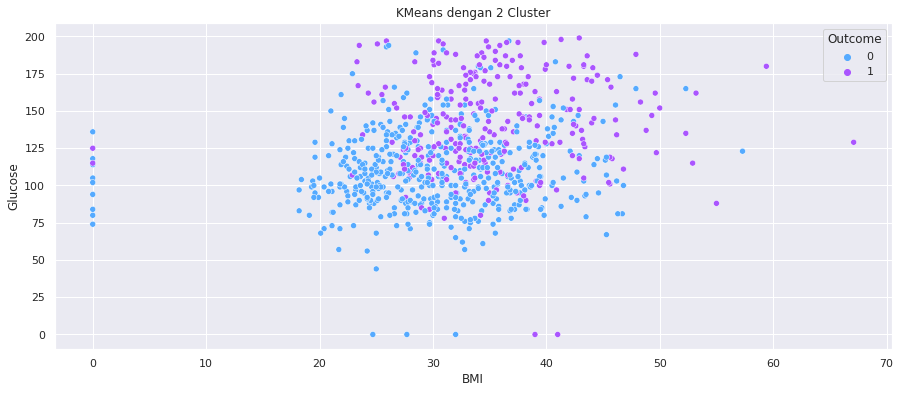

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df['BMI'], df['Glucose'], hue=df['Outcome'],
                palette=sns.color_palette('cool', 2))
plt.title('KMeans dengan 2 Cluster')
plt.show()

#---

> *References:* \\
Data context explanation: https://www.kaggle.com/mathchi/diabetes-data-set \\
Train vs. Validation section: https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib \\
SMOTE https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7
